In [ ]:
# All imports from python's standard library
import math

# ${\color{HotPink} \text{Task 1: Binary Representations}}$

### Task description

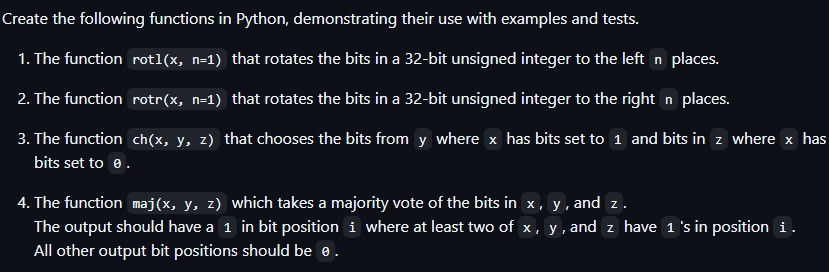

------

## ${\color{HotPink} \text{Notes for rotl()}}$

Material provided by lecturer on bitwise:  
https://github.com/ianmcloughlin/computational_theory/blob/main/materials/binary_representations.ipynb  
https://wiki.python.org/moin/BitwiseOperators 

CONCERNS:  
Should I handle wrap around bits?



In [12]:
# Task 1.1
def rotl(x, n):
    # Ensure that int x is 32 bits
    x = x & 0xFFFFFFFF

    # Ensure the bits don't move more than 32 bits
    n = n % 32
    
    # Move the int n positions, ensure it is 32 bits
    result = ((x << n)) & 0xFFFFFFFF

    # Print the result
    print("Results:")
    print("int: ", x, f"binary: {x:04b}")
    print("new int: ", result, f"new binary: {result:04b}")

    # Return
    return result

# Test
rotl(1, 2)

Results:
int:  1 binary: 0001
new int:  4 new binary: 0100


4

------

## ${\color{HotPink} \text{Notes for rotr()}}$

Rotl is the same as rotr but the bitwise opperator changes direction


In [13]:
# Task 1.2
def rotr(x, n):
    # Ensure that int x is 32 bits
    x = x & 0xFFFFFFFF

    # Ensure the bits don't move more than 32 bits
    n = n % 32
    
    # Move the int n positions, ensure it is 32 bits
    result = ((x >> n)) & 0xFFFFFFFF

    # Print the result
    print("Results:")
    print("int: ", x, f"binary: {x:04b}")
    print("new int: ", result, f"new binary: {result:04b}")

    # Return
    return result

# Tests
rotr(4, 1)

Results:
int:  4 binary: 0100
new int:  2 new binary: 0010


2

------

## ${\color{HotPink} \text{Notes for ch()}}$

As showcased in tests two & three the result may vary based on the lengths of binary inputs.  
I am not going to ensure the length of the result is the length of x.

In [14]:
# Task 1.3
def ch(x, y, z):
    
    # ~ = compliment or not (like ! operator but for a bit)
    # If x = 1 the output is taken from y.
    # If x = 0 the output is taken from z.
    result = (x & y) | (~x & z)

    return result

# Tests
test1 = ch(0b1010, 0b1100, 0b1110)
test2 = ch(0b0011101011110, 0b1110110010, 0b011101001101)
test3 = ch(0b0010101, 0b1110110010, 0b011101001101)

print(f"{test1:0b}")
print(f"{test2:0b}")
print(f"{test3:0b}")

1100
1100010011
11101011000


------

## ${\color{HotPink} \text{Notes for maj()}}$

maj stands for majority.
This function returns a new binary value based on the binary values passed in


In [15]:
# Task 1.4
def maj(x, y, z):

    # If at least 2 bits are 1 the output is 1 
    result = (x & y) | (x & z) | (y & z)

    return result

# Tests
test1 = maj(0b1000101, 0b1001001, 0b0011101)

print(f"{test1:0b}")

1001101


------

# ${\color{LightPink} \text{Task 2: Hash Functions}}$

### Task description

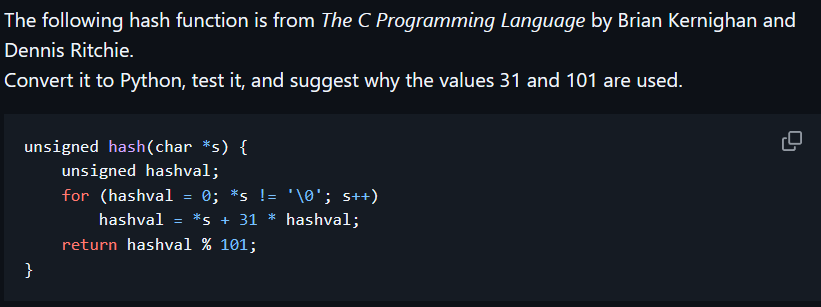

------

## ${\color{HotPink} \text{Notes for hash()}}$

${\color{HotPink} \text{The C Programming language book:}}$  
This is an unofficial link to a pdf copy of the book from google scholar.  
http://117.250.119.200:8080/jspui/bitstream/123456789/1373/1/%5BKernighan-Ritchie%5DThe_C_Programming_Language.pdf  

>${\color{HotPink} \text{Changes in the behaviour due to implementation}}$

${\color{HotPink} \text{Unsigned values}}$  
"An unsigned is an integer that can never be negative."  
https://soundsoftware.ac.uk/c-pitfall-unsigned.html#:~:text=C%20and%20C%2B%2B%20are%20unusual,that%20can%20never%20be%20negative.  

To replicate the way C's unsigned int functionality I forced the hashval to 32-bit unsigned mask in using "& 0xFFFFFFFF", this comes with the limitation of only storing numbers in the range of 0 to 4,294,967,295.

${\color{HotPink} \text{Ord}}$  
https://www.w3schools.com/python/ref_func_ord.asp  
This returns unicode representing the char, unlike the c implementation this supports special characters. 

>${\color{HotPink} \text{Signifigance of using 31 and 101}}$  

31: 
- It being a prime number it helped reduce collisions when used as a multiplier. A collision occurs when two different inputs produce the same hash values.  

- It is small enough to avoid overflow issues but large enough to spread out hash values. This was very helpful with the memory constraints in the C implementation. It is less necessary in the python implementation.  

101:
- By using value %(mod) 101, the return value fits between 0 - 100 inclusive, which helps with the storage constraints in C.
- Also it being a prime number helps avoid collisions.

${\color{HotPink} \text{Summary}}$  
- The hash method maintains the unsigned int behaviour seen in C by not allowing negative numbers, but it limits storage to 32 bits as a trade-off.  
- The ord method changes this implementation to include support for more characters, however this version behaves differently as a result.

In [16]:
def hash(s):
    hashval = 0
    for c in s:
        hashval = ord(c) + 31 * hashval & 0xFFFFFFFF
    return hashval % 101

test_string = "hash in python"
hash(test_string)

50

------

# ${\color{LightPink} \text{Task 3: SHA256}}$

### Task decription

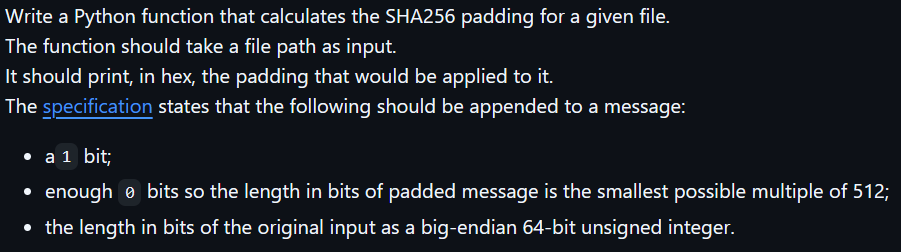

------

## ${\color{HotPink} \text{Notes for SHA256\_preprocess()}}$

${\color{HotPink} \text{Structure for a message in SHA256}}$  
The message is constructed in big-endian format for readability.  
512 bits = 64 bytes.  
message must be (in bytes):  
message (multple of 64 bytes) = 1 byte(To start) + zero bytes padding (to fill up to the next 64 byte multiple) + message + 8 bytes (length field)  

${\color{HotPink} \text{File reading mode 'rb'}}$  
https://www.geeksforgeeks.org/reading-binary-files-in-python/  
This reads a file and returns the raw bytes it has stored.  

${\color{HotPink} \text{to\_bytes() documentation}}$  
https://www.geeksforgeeks.org/to-bytes-in-python/  
Returns an array of bytes representing an integer.
Parameters:
- length set to 8 for bytes
- byteorder set to 'big' as in big-endian format (compiled from the left to the right), this is for consistency with the rest of message.

In [17]:
def SHA256_preprocess(file_path):
    print(file_path)

    # Open in read binary mode (returns in bytes)
    with open(file_path, 'rb') as f:
        data = f.read()
    
    # Calculate the length of the message in bits (8 bits per 1 byte)
    original_bit_len = len(data) * 8

    # The padding must equal at least 56 bytes total

    # start padding with the 1 byte (56 - 1 = 55 bytes remaining)
    message_padded = b'\x80' # this is in hex, in binary it is '10000000'

    # Append with 0 bytes for the amount of padding necessary
    # To calculate amount of zero bytes needed: minimum 55 bytes requirement - message size = x. 
    # x mod 64 (To keep the amount of padding needed between 0 - 63 no matter message size).
    message_padded += b'\x00' * ((55 - len(data)) % 64)

    # Add the original message length to the end as a 8-byte big-endian integer
    message_padded += original_bit_len.to_bytes(8, 'big')

    # Process 2 bytes at a time in hexadecimal (b:02x).
    # Seperated by space using ' '.join, using the for loop on padding
    hex_message_padding = ' '.join(f"{b:02x}" for b in message_padded)
    print(hex_message_padding)

    # Ensure the length field + the padding & message is a multiple of 512 bits
    print("Modulo 512 bits:", (original_bit_len + (len(message_padded) * 8) ) % 512)

SHA256_preprocess('./resources/task3_test.txt')
SHA256_preprocess('./README.md')

./resources/task3_test.txt
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18
Modulo 512 bits: 0
./README.md
80 00 00 00 00 00 00 00 00 00 00 01 98
Modulo 512 bits: 0


------

# ${\color{LightPink} \text{Task 4: Prime Numbers}}$

### Task decription

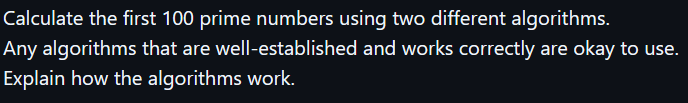

------

## ${\color{HotPink} \text{Notes for primes()}}$

## ${\color{HotPink} \text{Trial division algorithm}}$
https://www.khanacademy.org/computing/computer-science/cryptography/comp-number-theory/a/trial-division#:~:text=Trial%20division%20algorithm&text=Accept%20some%20input%20integer%20n,OR%20ELSE%20n%20is%20prime  

In [25]:
def is_prime(n):
        if n < 2:
            return False
        
        # Check divisibility of the numbers between 2 and sqrt + 1 
        for i in range(2, int(math.sqrt(n)) + 1):
            if n % i == 0: return False

        # No divisors found
        return True

def trial_division(n):
    primes = []
    candidate = 2

    # Keep searching until we find n amount of primes
    while len(primes) < n:
        if is_prime(candidate): 
            primes.append(candidate)
        # Check the next number
        candidate += 1

    return primes

trial_primes = trial_division(100)
print("Trial Division:", trial_primes)

Trial Division: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


------